In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
df = pd.read_csv('/content/Customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
df.duplicated().sum()

0

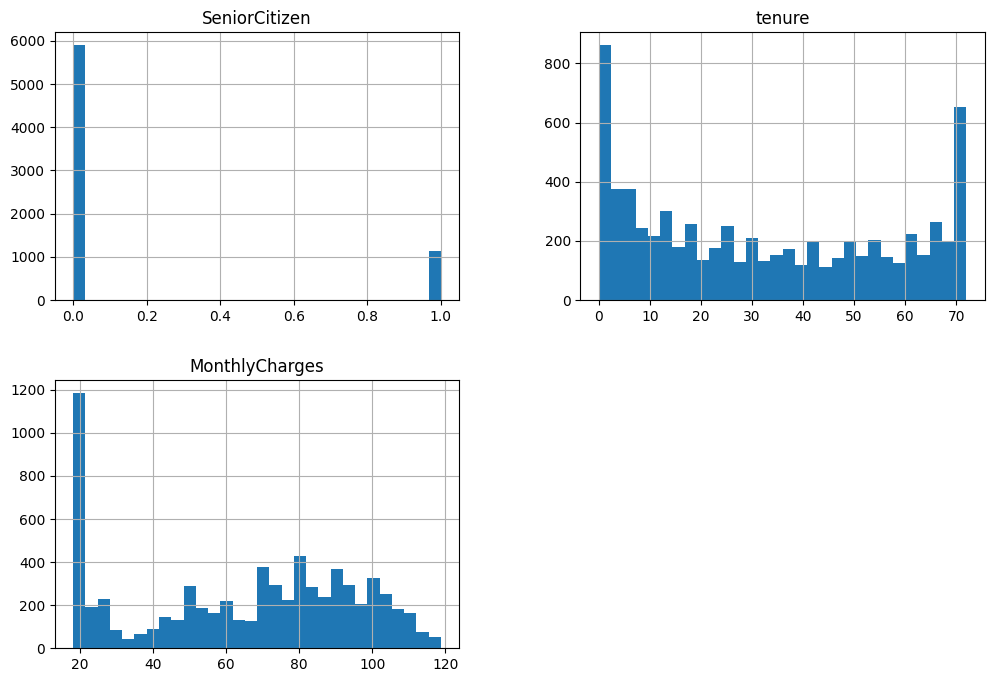

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(12,8))
plt.show()

**Preprocessing**

In [ ]:
# Loops through all categorical columns (type object) except the target variable Churn, encodes them into numbers using LabelEncoder, and stores the encoders for later use.
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Churn':  # 'Churn' is the target variable
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Map target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select features and target
features = df.drop(['customerID', 'Churn'], axis=1)
target = df['Churn']


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features to have a mean of 0 and a standard deviation of 1, ensuring fair treatment of all features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,  # Use the best model obtained from grid search
    X=X_train_pca,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # Use 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all available cores
)

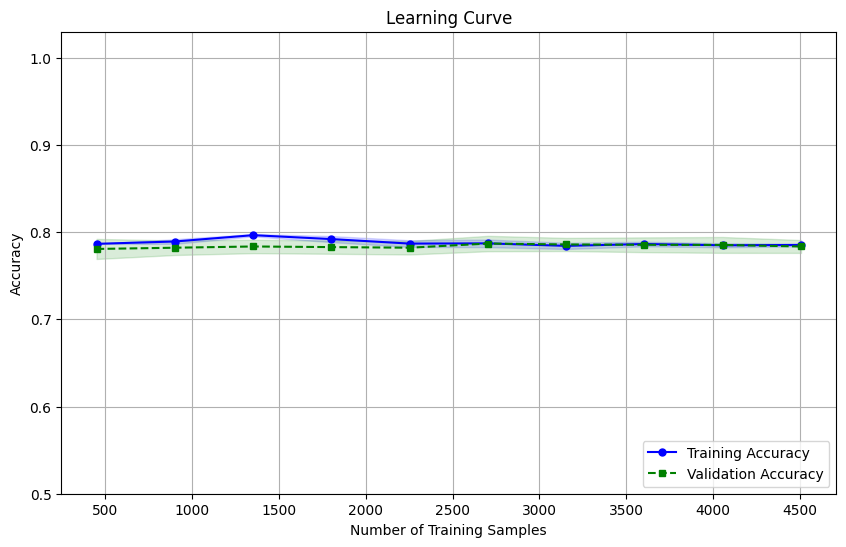

In [ ]:
# Compute mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])
plt.grid()
plt.show()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 0.01}

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1298
           1       0.64      0.49      0.55       463

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761

Accuracy Score: 0.7927314026121521


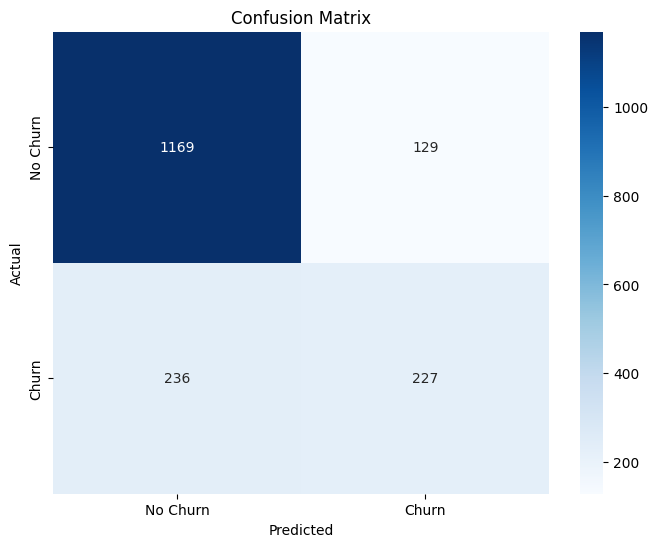

In [ ]:
# Perform Grid Search with Cross-Validation
#GridSearchCV: It is used to search for the best combination of hyperparameters for the given model (in this case, svc for Support Vector Classifier)
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

#param_grid: Contains a dictionary of hyperparameters (like C, gamma, kernel) and their possible values, which GridSearchCV will try in all combinations.
best_model = grid_search.best_estimator_

# The model with the best hyperparameters is used to make predictions on the test data (x_test).
y_pred = best_model.predict(x_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)3
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Apply PCA**

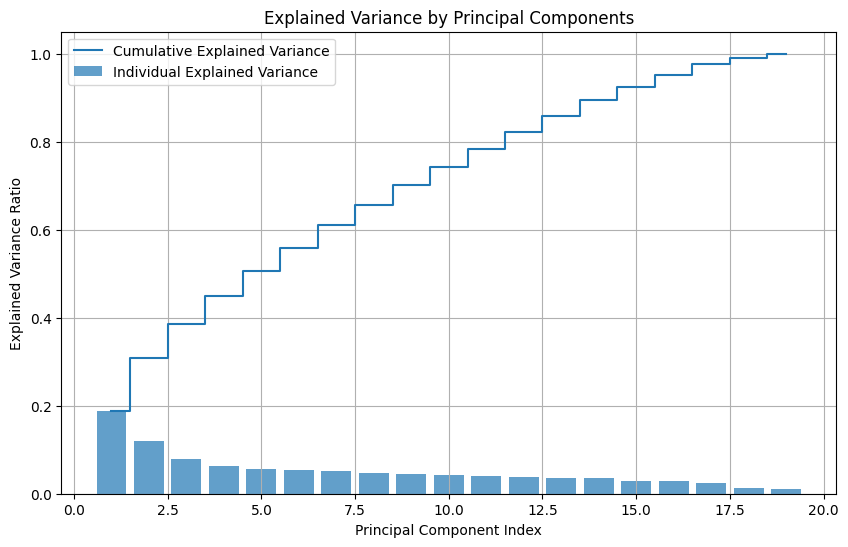

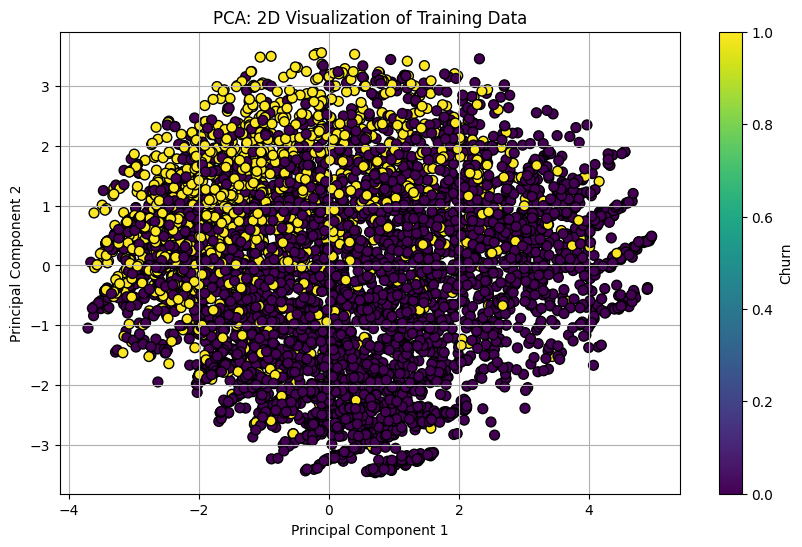

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA and plot explained variance
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#calculates the proportion of the total variance explained by each principal component.
# This tells you how much each component contributes to representing the variability in the data.

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

# It helps to decide how many components are needed to explain a desired amount of the total variance.
# Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance)

# Plot Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid()
plt.show()

# 2D Scatter Plot of First Two Principal Components
plt.figure(figsize=(10, 6))
plt.scatter(
    X_train_pca[:, 0],  # First principal component
    X_train_pca[:, 1],  # Second principal component
    c=y_train,          # Color by the target variable
    cmap='viridis',
    edgecolor='k',
    s=50
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Visualization of Training Data')
plt.colorbar(label='Churn')
plt.grid()
plt.show()
"""
Bar Plot:
Shows the proportion of variance explained by each individual component.
Line Plot:
Shows the cumulative explained variance as a function of the number of components.
Purpose:
Helps visualize how much variance each principal component explains and decide the number of components to retain.
""

C is a regularization parameter.
A high value of C:
Places more emphasis on minimizing training errors (i.e., trying to classify the training data as accurately as possible).
This can lead to overfitting, where the model becomes too complex and captures noise in the training data, performing poorly on unseen data (test set).
A low value of C:
Allows more misclassifications on the training data, which helps in obtaining a simpler decision boundary.
This can lead to underfitting, where the model might not capture the underlying patterns of the data well.

**Focuses on tuning the hyperparameters to find the best combination for the model**

In [ ]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]  # Only applicable for 'poly' kernel
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Display best parameters and accuracy
print("\nBest Parameters:")
print(grid_search.best_params_)
print("\nBest Score:")
print(grid_search.best_score_)


Best Parameters:
{'C': 1, 'degree': 3, 'kernel': 'poly'}

Best Score:
0.7846980540613805


**Takes the best model from GridSearchCV, fits it on the training data, makes predictions, and then evaluates its performance on the test data**

In [ ]:
# Final model with best hyperparameters
final_model = grid_search.best_estimator_
final_model.fit(X_train_pca, y_train)
y_final_pred = final_model.predict(X_test_pca)

# Final evaluation
print("\nFinal Confusion Matrix:")
print(confusion_matrix(y_test, y_final_pred))
print("\nFinal Classification Report:")
print(classification_report(y_test, y_final_pred))


Final Confusion Matrix:
[[975  61]
 [221 152]]

Final Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1036
           1       0.71      0.41      0.52       373

    accuracy                           0.80      1409
   macro avg       0.76      0.67      0.70      1409
weighted avg       0.79      0.80      0.78      1409



In [ ]:
# SVM model training
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_pca, y_train)

# Predictions
y_pred = svc.predict(X_test_pca)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[949  87]
 [202 171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

